Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

# Instantaneous heart rate

In [25]:
import numpy as np
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from systole import import_ppg
from systole.detection import oxi_peaks
from systole.utils import heart_rate

In [26]:
# Load data
oxi = import_ppg('2')[0]
oxi = oxi[500:1500]

In [27]:
# Extract peak vectors
signal, peaks = oxi_peaks(oxi)

In [28]:
# RR time serie
rr = np.diff(np.where(peaks)[0])
# Create time vector
time = np.cumsum(rr) + np.where(peaks)[0][0]

In [29]:
# Instantaneous heart rate
heartrate, new_time = heart_rate(peaks)

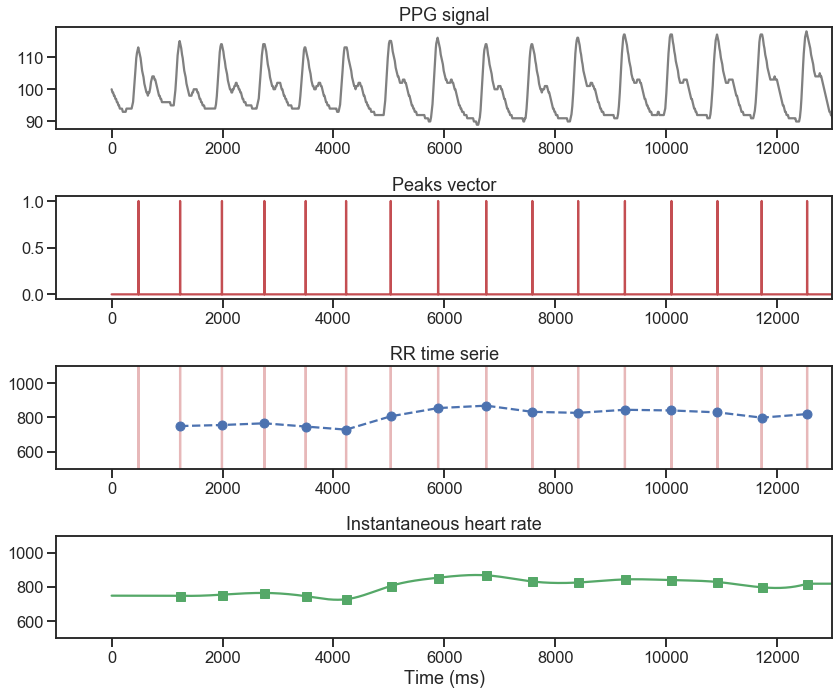

In [30]:
sns.set_context('talk')
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.title('PPG signal')
plt.plot(signal, 'gray')
plt.xlim(-1000, 13000)

plt.subplot(412)
plt.title('Peaks vector')
plt.plot(peaks, 'r')
plt.xlim(-1000, 13000)

plt.subplot(413)
plt.title('RR time serie')
plt.plot(peaks*2000, 'r', alpha=0.4)
plt.plot(time, rr, 'bo--')
plt.ylim(500, 1100)
plt.xlim(-1000, 13000)

plt.subplot(414)
plt.title('Instantaneous heart rate')
plt.plot(new_time, heartrate, 'g-')
plt.plot(peaks*200, 'r', alpha=0.4)
plt.plot(time, rr, 'gs')
plt.xlim(-1000, 13000)
plt.ylim(500, 1100)
plt.xlabel('Time (ms)')
plt.tight_layout()